In [1]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution, plot_histogram, array_to_latex

In [2]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Permite mejor calidad en las imágenes generadas.

## Non-unitary operations <a name="non_unitary"/>

Now that we have gone through all the unitary operations in quantum circuits, we also have access to non-unitary operations. These include measurements, reset of qubits, and classical conditional operations.

In [3]:
# Simulator to use in the following Quantum Circuits.
simulator = AerSimulator()

In [4]:
q = QuantumRegister(1, name='q')
c = ClassicalRegister(1, name='c')

### Measurements

We don't have access to all the information when we make a measurement in a quantum computer. The quantum state is projected onto the standard basis. Below are two examples showing a circuit that is prepared in a basis state and the quantum computer prepared in a superposition state.

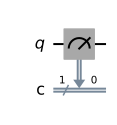

In [5]:
qc = QuantumCircuit(q, c)
qc.measure(q, c)

qc.draw('mpl')

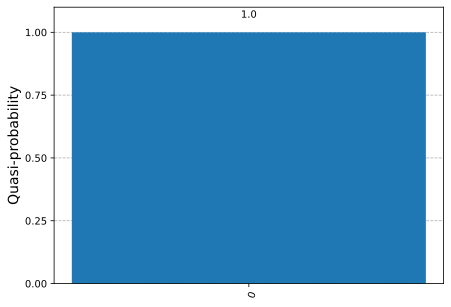

In [6]:
job = simulator.run(transpile(qc, simulator), shots=1024)
counts = job.result().get_counts(qc)

plot_distribution(counts)

 The simulator predicts that 100 percent of the time the classical register returns 0. 

### Reset:
It is also possible to `reset` qubits to the $\left|0\right\rangle$ state in the middle of computation. Note that `reset` is not a Gate operation, since it is irreversible.

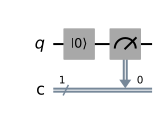

In [7]:
qc = QuantumCircuit(q, c)
qc.reset(q[0])
qc.measure(q, c)

qc.draw('mpl')

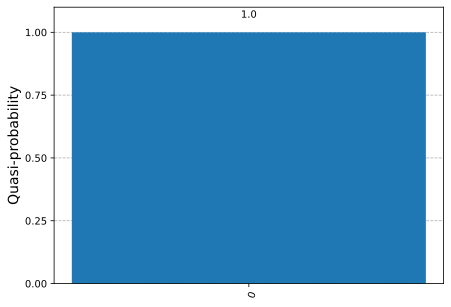

In [8]:
job = simulator.run(transpile(qc, simulator), shots=1024)
counts = job.result().get_counts(qc)

plot_distribution(counts)

The simulator always predicts that the output is 100 percent in the $\left|0\right\rangle$ state.

### Hadamard Gate:

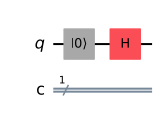

In [9]:
qc = QuantumCircuit(q, c)
# Se inicia el circuito en el estado |0>:
qc.reset(q[0])
# Aplica la compuerta de Hadamard:
qc.h(q)

# Se visualiza el circuito resultante:
qc.draw('mpl')

In [10]:
estado_parcial = qc.copy()
array_to_latex(Statevector(estado_parcial), prefix="\\ket{\\psi_1} = ")

<IPython.core.display.Latex object>

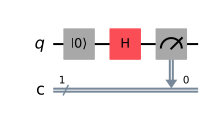

In [11]:
estado_parcial.measure(q, c)

# Se visualiza el circuito resultante:
estado_parcial.draw('mpl')

In [12]:
job = simulator.run(transpile(estado_parcial, simulator), shots=1024)
counts = job.result().get_counts(estado_parcial)

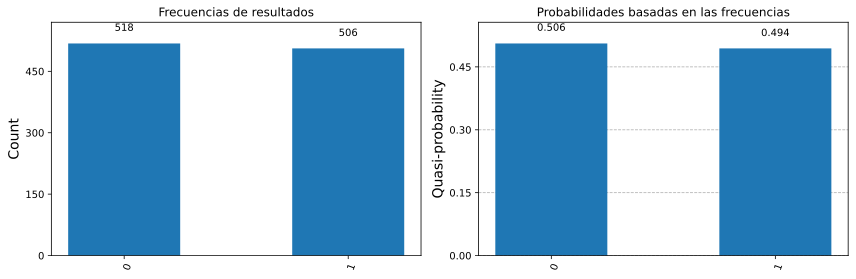

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram in each subplot
plot_histogram(counts, ax=axs[0])
plot_distribution(counts, ax=axs[1])

axs[0].set_title("Frecuencias de resultados")
axs[1].set_title("Probabilidades basadas en las frecuencias")

plt.tight_layout()
plt.show()

Here, the Hadamard gate creates an equal superposition of the $\left|0\right\rangle$ and $\left|1\right\rangle$ states, with each having a 50% probability.

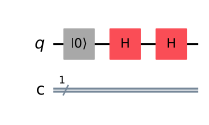

In [14]:
# Aplica la segunda compuerta de Hadamard:
qc.h(0)

# Se visualiza el nuevo circuito resultante:
qc.draw('mpl')

In [15]:
estado_parcial = qc.copy()
array_to_latex(Statevector(estado_parcial), prefix="\\ket{\\psi_2} = ")

<IPython.core.display.Latex object>

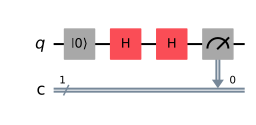

In [16]:
# Se agrega medidor del qubit sobre un registro clásico.
qc.measure(q, c)

# Se visualiza el circuito resultante:
qc.draw('mpl')

In [17]:
job = simulator.run(transpile(qc, simulator), shots=1024)
counts = job.result().get_counts(qc)

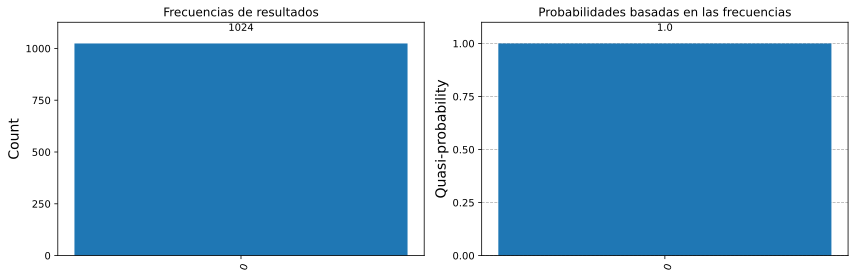

In [18]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram in each subplot
plot_histogram(counts, ax=axs[0])
plot_distribution(counts, ax=axs[1])

axs[0].set_title("Frecuencias de resultados")
axs[1].set_title("Probabilidades basadas en las frecuencias")

# Adjust layout and show
plt.tight_layout()
plt.show()

After two Hadamard gates, the circuit returns to the $\left|0\right\rangle$ state, and the simulator always predicts this outcome with 100% certainty.

### Conditional operations
It is also possible to do operations conditioned on the state of the classical register

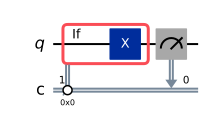

In [19]:
qc = QuantumCircuit(q, c)

with qc.if_test((c, 0)):
        qc.x(q[0])
qc.measure(q,c)

qc.draw('mpl')

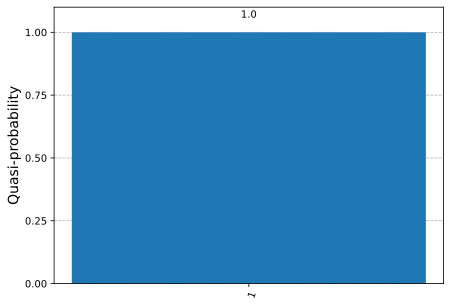

In [20]:
job = simulator.run(transpile(qc, simulator), shots=1024)
counts = job.result().get_counts(qc)

plot_distribution(counts)

Here the classical bit always takes the value 0 so the qubit state is always flipped. 

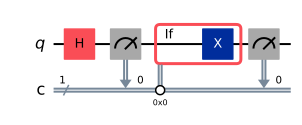

In [21]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)

with qc.if_test((c, 0)):
        qc.x(q[0])
qc.measure(q,c)

qc.draw('mpl')

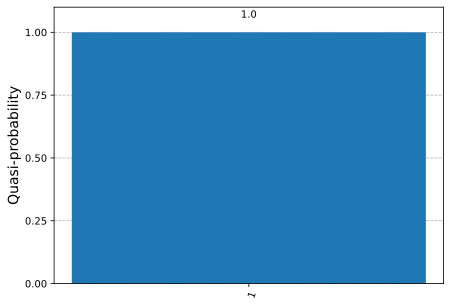

In [22]:
job = simulator.run(transpile(qc, simulator), shots=1024)
counts = job.result().get_counts(qc)

plot_distribution(counts)

Here the classical bit by the first measurement is random but the conditional operation results in the qubit being deterministically put into $\left|1\right\rangle$.

In [23]:
from qiskit import __version__ as qiskit_version
from qiskit_ibm_runtime import __version__ as runtime_version
from qiskit_aer import __version__ as aer_version
from IPython.display import display, Math
from platform import python_version

print('Qiskit Version:', qiskit_version)
print('IBM RunTime Version:', runtime_version)
print('Qiskit_Aer Version:', aer_version)
print('Python Version:', python_version())
print('2025 ©')

Qiskit Version: 1.3.2
IBM RunTime Version: 0.35.0
Qiskit_Aer Version: 0.16.1
Python Version: 3.13.1
2025 ©
